In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

In [2]:
fig_num = 3
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d',
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z',
                  'cam_3d_canonical_revolute', 'img_2d_canonical_revolute',
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_z...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_z...
[overwrite: False] ==> Loading H36M cam_3d_canonical_revolute...
[overwrite: False] ==> Loading H36M img_2d_canonical_revolute...


In [3]:
source = 'S1_55011271_Walking'
subject, cam_id, action = split_source_name(source, dataset_name)
print(subject, cam_id, action)
cam_3d = data['cam_3d'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
cam_3d_hat = cam_3d.copy() - cam_3d[:, 0:1]
cam_3d_canonical = data['cam_3d_canonical_revolute'][subject][action][cam_id].copy()
img_2d_canonical = data['img_2d_canonical_revolute'][subject][action][cam_id].copy()
cam_3d_canonical_hat = cam_3d_canonical.copy() - cam_3d_canonical[:, 0:1]
cam_param = data['cam_param'][subject][action][cam_id].copy()
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
img_2d_norm = normalize_input(img_2d, W, H)
img_2d_centered = img_2d_norm.copy() - img_2d_norm[:, 0:1]
img_2d_canonical_norm = normalize_input(img_2d_canonical, W, H)

S1 55011271 Walking


### 3D poses - (c) front view / top view

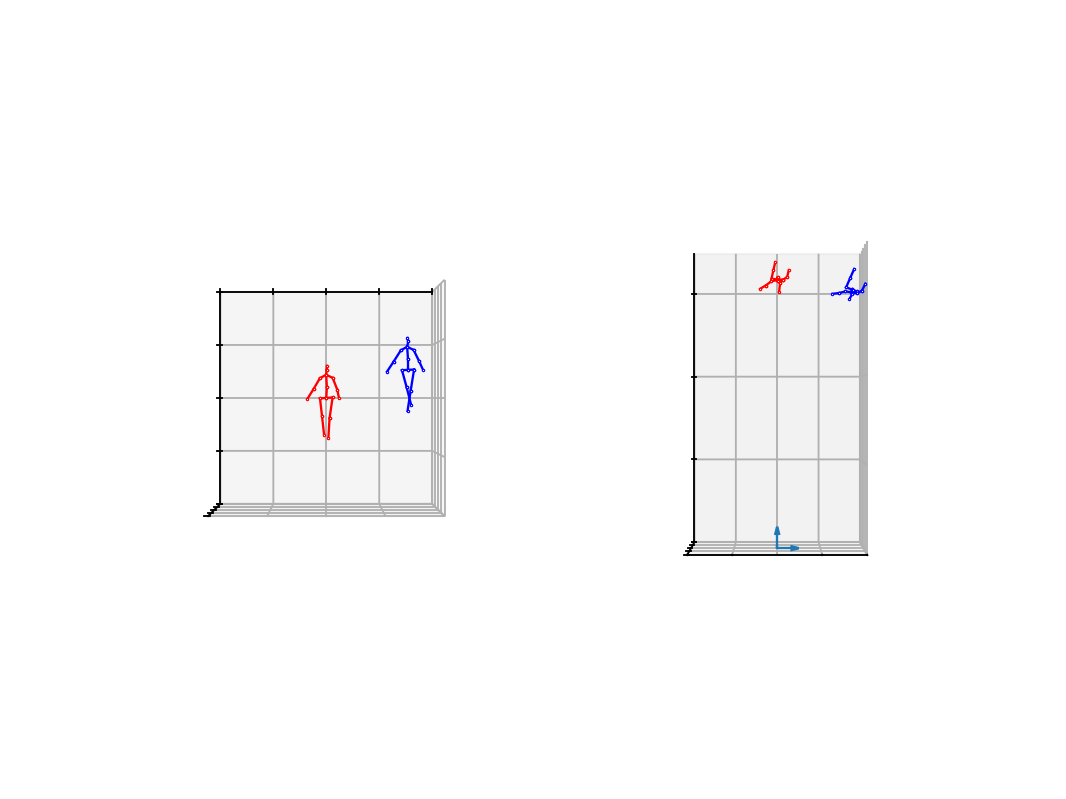

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig3/fig3_a_front_top.svg


In [6]:
sub_num= 'a_front_top'
frame_num = 200

configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 122, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
}
fig, axs = generate_axes(sub_num, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d,               {'color': 'b', 'label': 'Original 3D Pose'}),
    ('ax_3d_top', cam_3d,           {'color': 'b', 'label': 'Original 3D Pose'}),
    ('ax_3d', cam_3d_canonical,     {'color': 'r', 'label': 'Canonical 3D Pose', 'lw': 1}),
    ('ax_3d_top', cam_3d_canonical, {'color': 'r', 'label': 'Canonical 3D Pose', 'lw': 1}),
]

general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10)
axs['ax_3d'].axes.xaxis.set_ticklabels([])
axs['ax_3d'].axes.yaxis.set_ticklabels([])
axs['ax_3d'].axes.zaxis.set_ticklabels([])
axs['ax_3d'].axes.set_xlabel('')
axs['ax_3d'].axes.set_ylabel('')
axs['ax_3d'].axes.set_zlabel('')
axs['ax_3d'].legend().remove()
axs['ax_3d'].set_title('')
axs['ax_3d_top'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top'].axes.set_xlabel('')
axs['ax_3d_top'].axes.set_ylabel('')
axs['ax_3d_top'].axes.set_zlabel('')
axs['ax_3d_top'].legend().remove()
axs['ax_3d_top'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top'])
camera.cam_frame.draw3d(show_name=False, show_axis=False)
plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300, facecolor='white')
print(os.path.abspath(save_path))


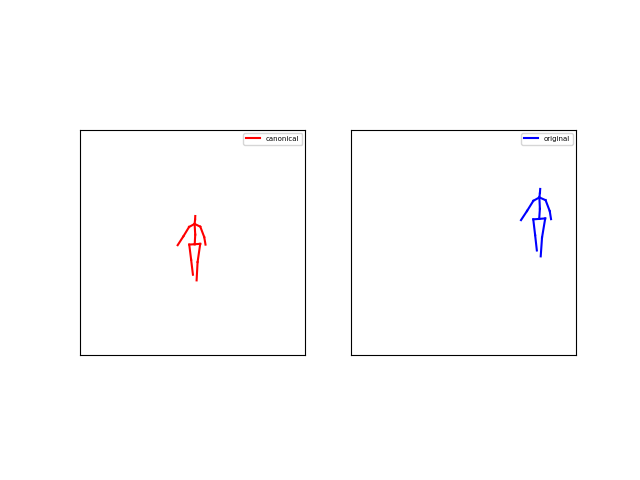

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig3/fig3_de.svg


In [7]:
sub_num= 'de'
frame_num = 200

configs = {
    'ax_2d_canon': {'type': '2d', 'loc': 121, 'normalize': True},
    'ax_2d_orig': {'type': '2d', 'loc': 122, 'normalize': True},
    #'ax_2d_center': {'type': '2d', 'loc': 133, 'normalize': True},
}
fig, axs = generate_axes(sub_num, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d_canon', img_2d_canonical_norm, {'color': 'r', 'label': 'canonical'}),
    ('ax_2d_orig', img_2d_norm, {'color': 'b', 'label': 'original'}),
    #('ax_2d_center', img_2d_centered, {'color': 'g', 'label': 'centered'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d_canon'].axes.xaxis.set_ticklabels([])
axs['ax_2d_canon'].axes.xaxis.set_ticks([])
axs['ax_2d_canon'].axes.set_xlabel('')
axs['ax_2d_canon'].axes.yaxis.set_ticklabels([])
axs['ax_2d_canon'].axes.yaxis.set_ticks([])
axs['ax_2d_canon'].axes.set_ylabel('')
#axs['ax_2d_canon'].legend().remove()
axs['ax_2d_canon'].set_title('')

axs['ax_2d_orig'].axes.xaxis.set_ticklabels([])
axs['ax_2d_orig'].axes.xaxis.set_ticks([])
axs['ax_2d_orig'].axes.set_xlabel('')
axs['ax_2d_orig'].axes.yaxis.set_ticklabels([])
axs['ax_2d_orig'].axes.yaxis.set_ticks([])
axs['ax_2d_orig'].axes.set_ylabel('')
#axs['ax_2d_orig'].legend().remove()
axs['ax_2d_orig'].set_title('')

# axs['ax_2d_center'].axes.xaxis.set_ticklabels([])
# axs['ax_2d_center'].axes.xaxis.set_ticks([])
# axs['ax_2d_center'].axes.set_xlabel('')
# axs['ax_2d_center'].axes.yaxis.set_ticklabels([])
# axs['ax_2d_center'].axes.yaxis.set_ticks([])
# axs['ax_2d_center'].axes.set_ylabel('')
# #axs['ax_2d_center'].legend().remove()
# axs['ax_2d_center'].set_title('')


plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
print(os.path.abspath(save_path))


### 3D poses - (b) root-relative original 3D pose (c) root-relative canonical 3D pose

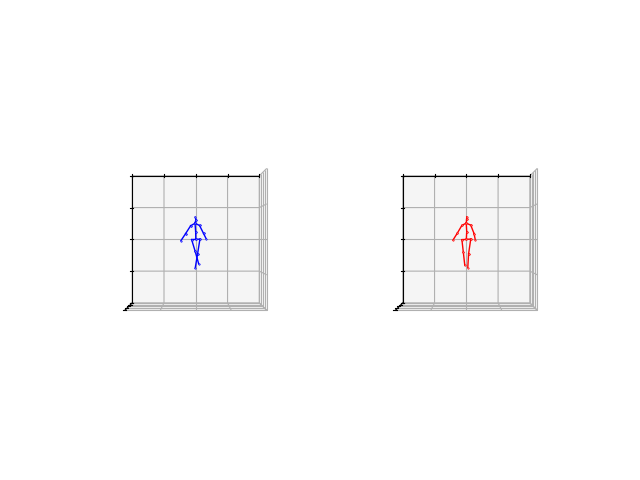

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig3/fig3_bc_root_relative_3d.svg


In [7]:
sub_num= 'bc_root_relative_3d'
frame_num = 200

configs = {
    'ax_3d_orig': {'type': '3d', 'loc': 121, 'mode': 'cam'},
    'ax_3d_canon': {'type': '3d', 'loc': 122, 'mode': 'cam'},
}
fig, axs = generate_axes(sub_num, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_orig', cam_3d_hat,               {'color': 'b', 'label': 'Original Root-relative 3D Pose'}),
    ('ax_3d_canon', cam_3d_canonical_hat,     {'color': 'r', 'label': 'Canonical Root-relative 3D Pose', 'lw': 1}),
]

general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10)
axs['ax_3d_orig'].axes.xaxis.set_ticklabels([])
axs['ax_3d_orig'].axes.yaxis.set_ticklabels([])
axs['ax_3d_orig'].axes.zaxis.set_ticklabels([])
axs['ax_3d_orig'].axes.set_xlabel('')
axs['ax_3d_orig'].axes.set_ylabel('')
axs['ax_3d_orig'].axes.set_zlabel('')
axs['ax_3d_orig'].legend().remove()
axs['ax_3d_orig'].set_title('')

axs['ax_3d_canon'].axes.xaxis.set_ticklabels([])
axs['ax_3d_canon'].axes.yaxis.set_ticklabels([])
axs['ax_3d_canon'].axes.zaxis.set_ticklabels([])
axs['ax_3d_canon'].axes.set_xlabel('')
axs['ax_3d_canon'].axes.set_ylabel('')
axs['ax_3d_canon'].axes.set_zlabel('')
axs['ax_3d_canon'].legend().remove()
axs['ax_3d_canon'].set_title('')

plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
print(os.path.abspath(save_path))
